# TOC:
- [Description](#1)
- [Importing modules](#2)
- [Solving](#3)
- [Visualization](#4)

# Description <a class="anchor" id="1"></a>

***Products X and Y to be produced through two assembly lines sharing one packaging line***

***Assembly lines weekly capacity:***
* X: 8,000 un/week
* Y: 5,800 un/week
    
***Packaging line weekly capacity:***
* 10,000 un/week
    
***Minimum weekly demand:***
* X = 4,000 un/week
* Y = 3,000 un/week
    
***Profit per product:***
* X:  £25/un
* Y:  £31/un

***Objective:***
* Maximise total profit

# Importing modules <a class="anchor" id="2"></a>

In [139]:
import pandas as pd
import numpy as np

# linear programming solver
from pulp import LpMaximize, LpProblem, LpVariable

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

# Solving <a class="anchor" id="3"></a>

In [195]:
# create model
model = LpProblem(name="model", sense=LpMaximize)

# declare variables and boundary constraints for each production line (minimum demand and maximum assembly capacity)
xb = (4500, 8000)
yb = (3000, 5800)
x = LpVariable(name="x", lowBound=xb[0], upBound = xb[1], cat="Integer")
y = LpVariable(name="y", lowBound=yb[0], upBound = yb[1], cat="Integer")

# set profit as objective function
px, py = 25 , 31
model += (px * x) + (py * y)

# Add constraints (packaging line capacity)
c1 = 10000
model += (x + y <= c1, "packaging")

#print(model)

In [198]:
model.solve()

print ('Optimization Report:\n')

opt_prod = []
count = 0
for variable in model.variables():
    opt_prod.append(int(variable.value()))
    print(f"Optimal production for {variable.name} is {opt_prod[count]:,} un/week")
    count =+ 1
    
max_profit = int(model.objective.value())    
print(f"\nThis will yield a total profit of £{max_profit:,} per week\n")

print(f"Spare capacity for line x is {opt_prod[0]/xb[1]:.1%}")
print(f"Spare capacity for line y is {opt_prod[1]/yb[1]:.1%}")

Optimization Report:

Optimal production for x is 4,500 un/week
Optimal production for y is 5,500 un/week

This will yield a total profit of £283,000 per week

Spare capacity for line x is 56.2%
Spare capacity for line y is 94.8%


# Visualization <a class="anchor" id="4"></a>

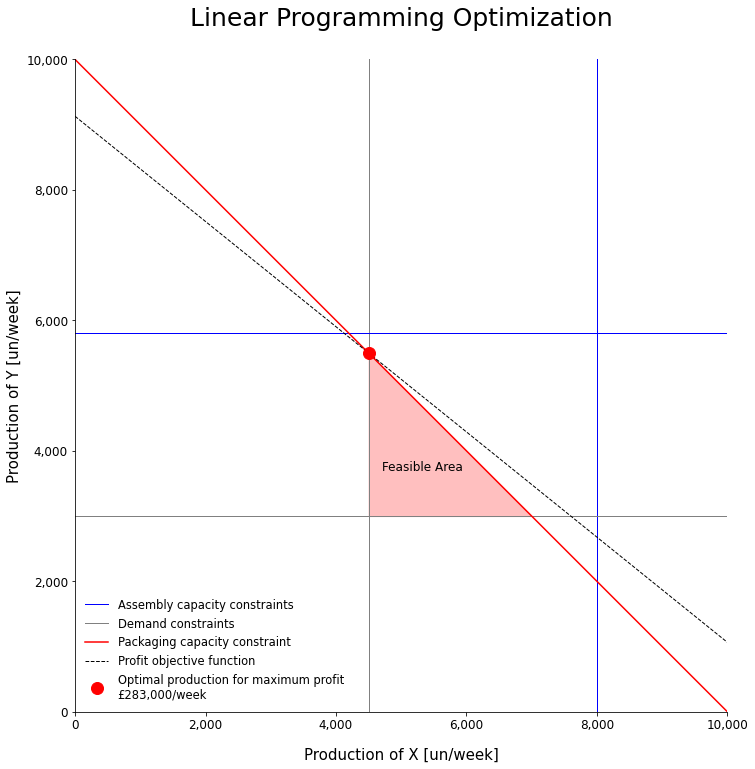

In [201]:
fig, ax = plt.subplots(figsize=(12,12))
plt.gca().set_aspect('equal', adjustable='box')

# Set limits
ax.set_xlim([0, c1])
ax.set_ylim([0, c1])

ax.set_title('Linear Programming Optimization\n', size = 25)
ax.set_xlabel('Production of X [un/week]', size = 15, labelpad = 15)
ax.set_ylabel('Production of Y [un/week]', size = 15)

# X production - demand constraint
plt.axvline(xb[1], color='b', linestyle='-', linewidth = 1, label = 'Assembly capacity constraints')
plt.axvline(xb[0], color='grey', linestyle='-', linewidth = 1)

# Y production - demand constraint
plt.axhline(yb[1], color='b', linestyle='-', linewidth = 1)
plt.axhline(yb[0], color='grey', linestyle='-', linewidth = 1, label = 'Demand constraints')

# Packaging line constraint
X = np.linspace(0, c1, 100)
plt.plot(X, c1 - X, label = 'Packaging capacity constraint', color = 'r')

# Profit objective function
plt.plot(X, (max_profit - X * px)/py, label = 'Profit objective function', color = 'black',linestyle='--', linewidth=1 )

# Optimal production output
plt.plot(4500, 5500, 'ro', markersize=12, label = f"Optimal production for maximum profit\n£{max_profit:,}/week", color ='r')

# fill in the feasible region
X2 = np.linspace(xb[0], xb[1], 100)
plt.fill_between(X2, yb[0], c1 - X2, where = c1 - X2 >= yb[0], color ='red', alpha = 0.25)

# Anotations
ax.text(4700, 3700, 'Feasible Area', fontsize=12)
#ax.plot(xb[1], yb[1], 'ro', markersize=12, label = 'Maximum production at assembly lines\nfull capacity', color ='b')
#ax.annotate('', xy=(xb[1], yb[1]), xytext=(6000, 3800),arrowprops=dict(facecolor='black', shrink=0.05, width=0.05))

# Chart features
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(prop={'size':11.5}, frameon=False)

plt.show()